In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# Loading data
data = pd.read_csv("Global_AI_Content_Impact_Dataset.csv")

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           200 non-null    object 
 1   Year                              200 non-null    int64  
 2   Industry                          200 non-null    object 
 3   AI Adoption Rate                  200 non-null    float64
 4   AI-Generated Content Volume       200 non-null    float64
 5   Job Loss Due to AI                200 non-null    float64
 6   Revenue Increase Due to AI        200 non-null    float64
 7   Human-AI Collaboration Rate       200 non-null    float64
 8   Top AI Tools Used                 200 non-null    object 
 9   Regulation Status                 200 non-null    object 
 10  Consumer Trust in AI (%)          200 non-null    float64
 11  Market Share of AI Companies (%)  200 non-null    float64
dtypes: float

In [243]:
data.shape

(200, 12)

In [59]:
data.head()

,Country,Year,Industry,AI Adoption Rate,AI-Generated Content Volume,Job Loss Due to AI,Revenue Increase Due to AI,Human-AI Collaboration Rate,Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [247]:
columns_needed = [
    'Country',
    'Year',
    'Industry',
    'AI Adoption Rate',
    'AI-Generated Content Volume',
    'Revenue Increase Due to AI',
]
clean_data = data[columns_needed]
clean_data

,Country,Year,Industry,AI Adoption Rate,AI-Generated Content Volume,Revenue Increase Due to AI
0,South Korea,2022,Media,44.29,33.09,46.12
1,China,2025,Legal,34.75,66.74,52.46
2,USA,2022,Automotive,81.06,96.13,45.60
3,France,2021,Legal,85.24,93.76,78.24
4,France,2021,Gaming,78.95,45.62,1.05
...,...,...,...,...,...,...
195,Germany,2021,Automotive,89.44,52.98,12.14
196,Germany,2020,Media,70.11,28.26,57.86
197,France,2023,Marketing,65.77,49.83,79.44
198,Australia,2023,Automotive,45.35,20.49,50.50


In [249]:
# Country wise AI content generation.
country_wise = clean_data.groupby('Country')['AI-Generated Content Volume'].mean().sort_values()
print(country_wise)

Country
UK             39.092000
Japan          40.249545
Germany        44.785882
India          44.996250
USA            46.048571
France         47.430833
South Korea    48.691500
Australia      48.772000
Canada         49.110625
China          52.827619
Name: AI-Generated Content Volume, dtype: float64


In [ ]:
# Industry wise AI adoption and Revenue increase due to AI
industry_avg = clean_data.groupby('Industry')[['AI Adoption Rate','Revenue Increase Due to AI']].mean()
print(industry_avg)

               AI Adoption Rate  Revenue Increase Due to AI
Industry                                                   
Automotive            54.887895                   46.482632
Education             57.028235                   39.543529
Finance               55.764286                   36.257143
Gaming                60.416296                   33.234444
Healthcare            55.734118                   38.586471
Legal                 56.077647                   41.824118
Manufacturing         57.014444                   42.807222
Marketing             54.244211                   36.813684
Media                 47.263226                   43.719677
Retail                47.905714                   37.679524


In [254]:
correlation = clean_data['AI Adoption Rate'].corr(clean_data['Revenue Increase Due to AI'])
print(correlation)

0.0018826647192411953


In [265]:
# Revenue per unit of AI adoption
clean_data['Revenue % per Adoption'] = clean_data['Revenue Increase Due to AI'] / clean_data['AI Adoption Rate']
industry_efficiency = clean_data.groupby('Industry')['Revenue % per Adoption'].mean().sort_values()
print(industry_efficiency)


Industry
Gaming           0.644405
Marketing        0.758345
Legal            0.814106
Education        0.826271
Manufacturing    0.930345
Media            1.083413
Finance          1.136563
Healthcare       1.153811
Automotive       1.229775
Retail           1.341319
Name: Revenue % per Adoption, dtype: float64


/var/folders/s_/mj63k8m1523gmms0h_n8n6580000gn/T/ipykernel_92393/2981447604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Revenue % per Adoption'] = clean_data['Revenue Increase Due to AI'] / clean_data['AI Adoption Rate']


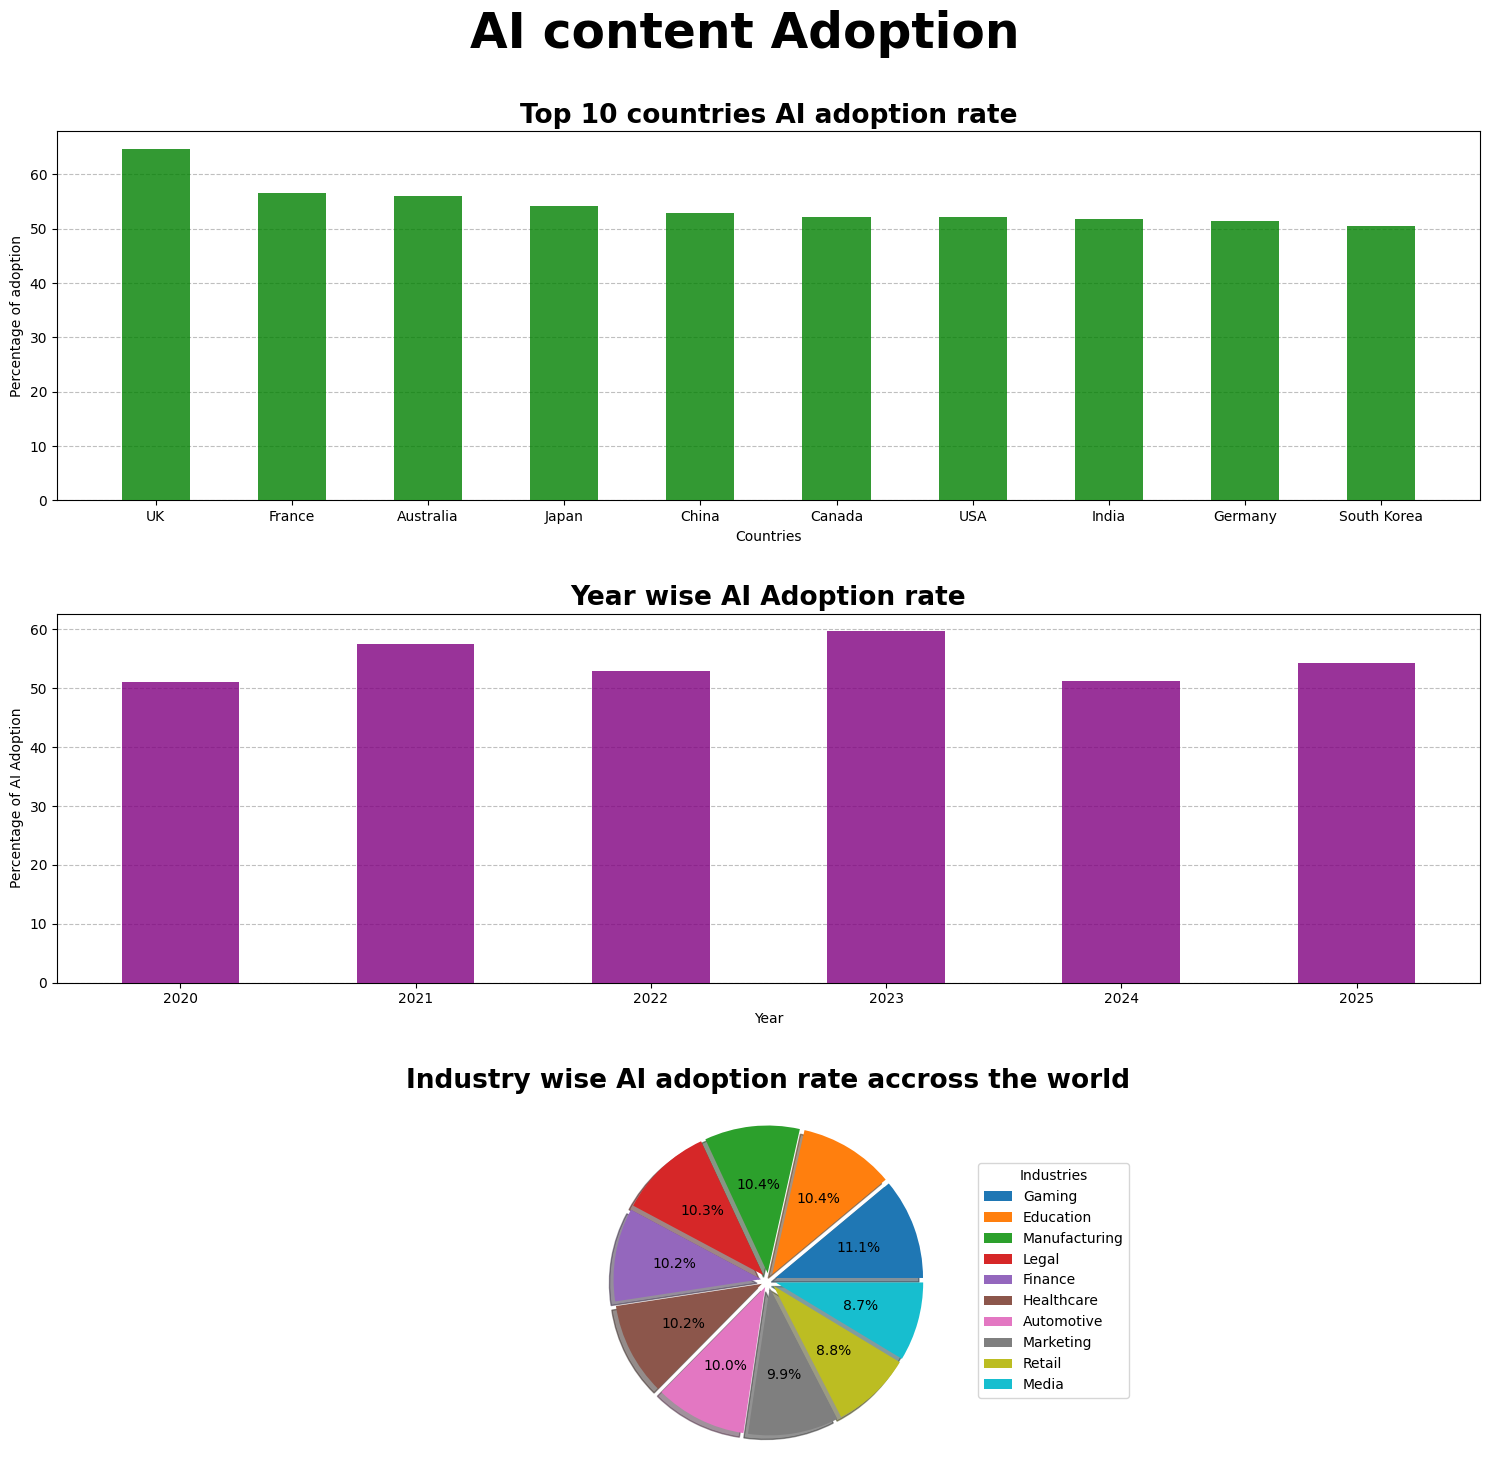

In [ ]:
# AI Adoption rate


# Top 10 Countries with highest AI adoption rate
top_10_countries = data.groupby('Country')['AI Adoption Rate'].mean().sort_values(ascending=False).head(10)
top_10_countries

# Plotting top 10 countries
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.bar(top_10_countries.index, top_10_countries.values, color = 'green', width= 0.5, zorder = 3, alpha = 0.8)
plt.title("Top 10 countries AI adoption rate", fontsize = 19, fontweight = 'bold')
plt.ylabel("Percentage of adoption")
plt.xlabel("Countries")
plt.grid(axis='y', linestyle = '--', alpha = 0.8)


# Year wise adoption rate
year_wise = data.groupby('Year')['AI Adoption Rate'].mean()
plt.subplot(3,1,2)
plt.bar(year_wise.index, year_wise.values, color = 'purple', width= 0.5, zorder = 3, alpha = 0.8)
plt.xlabel("Year")
plt.ylabel('Percentage of AI Adoption')
plt.title("Year wise AI Adoption rate", fontsize = 19, fontweight = 'bold')
plt.grid(axis='y', linestyle = '--', alpha = 0.8)


# Industry wise AI generated content
Industry_wise_order = data.groupby('Industry')['AI Adoption Rate'].mean().sort_values(ascending=False)
Industry_wise_percentage = Industry_wise_order / Industry_wise_order.sum() * 100

# Plotting Pie chart
explode = [0.05] * len(Industry_wise_order)

plt.subplot(3,1,3)
plt.pie(Industry_wise_percentage, autopct='%1.1f%%', shadow=True, explode= explode)
plt.legend(Industry_wise_percentage.index,
           title="Industries",
           loc = 'center left',
    bbox_to_anchor=(1.05, 0.5))
plt.title("Industry wise AI adoption rate accross the world", fontsize = 19, fontweight = 'bold')

plt.suptitle("AI content Adoption", fontsize = 35, fontweight = 'bold')
plt.tight_layout(rect=[0,0,1,0.97], h_pad=3)
plt.show()

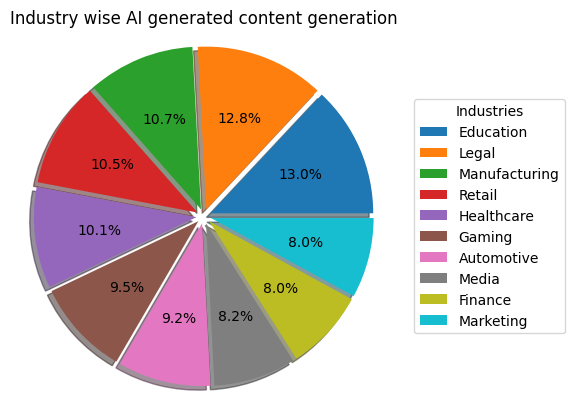

In [250]:
# Industry wise AI generated content
Industry_wise_order = data.groupby('Industry')['AI-Generated Content Volume'].mean().sort_values(ascending=False)
Industry_wise_percentage = Industry_wise_order / Industry_wise_order.sum() * 100

# Plotting Pie chart
explode = [0.05] * len(Industry_wise_order)
plt.pie(Industry_wise_percentage, autopct='%1.1f%%', shadow=True, explode= explode , radius= 1.1)
plt.legend(Industry_wise_percentage.index,
           title="Industries",
           loc = 'center left',
    bbox_to_anchor=(1.05, 0.5))
plt.title("Industry wise AI generated content generation")
plt.show()

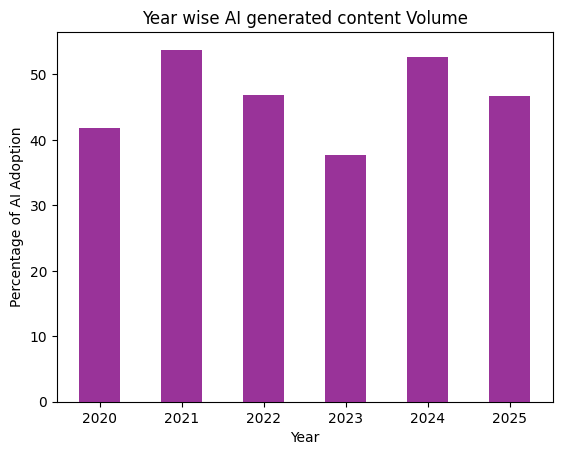

In [251]:
# Year wise adoption rate
year_wise = data.groupby('Year')['AI-Generated Content Volume'].mean()

plt.bar(year_wise.index, year_wise.values, color = 'purple', width= 0.5, zorder = 3, alpha = 0.8)
plt.xlabel("Year")
plt.ylabel('Percentage of AI Adoption')
plt.title("Year wise AI generated content Volume")

plt.show()

In [267]:
job_loss = data.groupby('Industry')['Job Loss Due to AI'].mean().sort_values(ascending=False)
print(job_loss)

Industry
Manufacturing    32.746111
Automotive       28.916842
Legal            28.234118
Finance          27.790000
Gaming           27.204074
Education        26.142353
Healthcare       25.579412
Media            22.749032
Retail           21.846667
Marketing        19.577895
Name: Job Loss Due to AI, dtype: float64
